In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

###'Source data import'



In [4]:
data= pd.read_csv("/content/train.csv")

In [5]:
'Data Segregation'
numdata = data.select_dtypes(include = np.number)
catdata = data.select_dtypes(exclude = np.number)

In [ ]:
data.isnull().sum()

In [8]:
# 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>=1]
# 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

In [ ]:
data.dtypes

In [12]:
print(data.shape)

(67463, 35)


In [11]:
print(data.size)

2361205


**Filling the missing values**

###Categorical Data

In [ ]:
# filling missing values of categorical variables 

#Factorize Encoding
for i in catdata:
    catdata[i] = catdata[i].factorize()[0]

###Continuous Data: Mean

In [14]:
# filling missing values of continuous variables with mean
data['Total Received Late Fee'].fillna(data['Total Received Late Fee'].mean(), inplace=True)
data['Recoveries'].fillna(data['Recoveries'].mean(), inplace=True)
data['Collection Recovery Fee'].fillna(data['Collection Recovery Fee'].mean(), inplace=True)
data['Collection 12 months Medical'].fillna(data['Collection 12 months Medical'].mean(), inplace=True)
data['Last week Pay'].fillna(data['Last week Pay'].mean(), inplace=True)
data['Accounts Delinquent'].fillna(data['Accounts Delinquent'].mean(), inplace=True)
data['Total Collection Amount'].fillna(data['Total Collection Amount'].mean(), inplace=True)
data['Total Current Balance'].fillna(data['Total Current Balance'].mean(), inplace=True)
data['Total Revolving Credit Limit'].fillna(data['Total Revolving Credit Limit'].mean(), inplace=True)
data['Loan Status'].fillna(data['Loan Status'].mean(), inplace=True)

#### Numerical variables are usually of 2 type
#### 1. Continous variable and Discrete Variables

In [16]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  26


In [17]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in ['ID'] ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 7


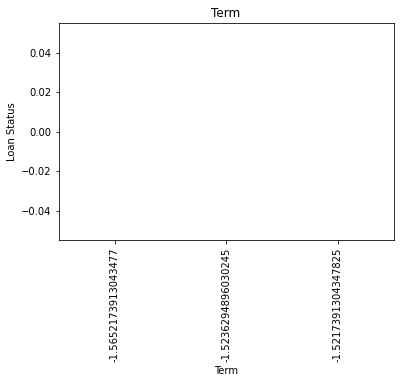

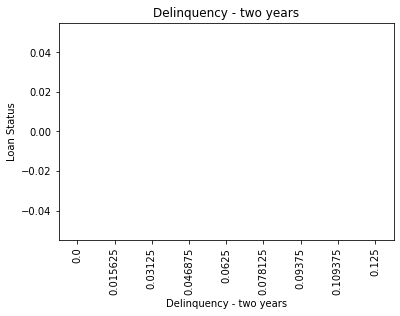

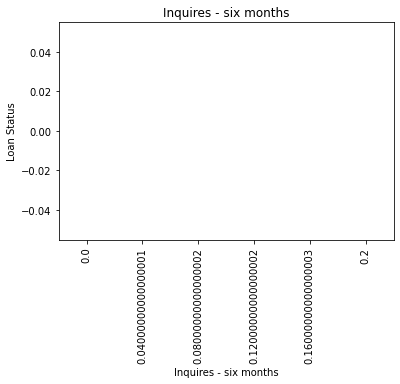

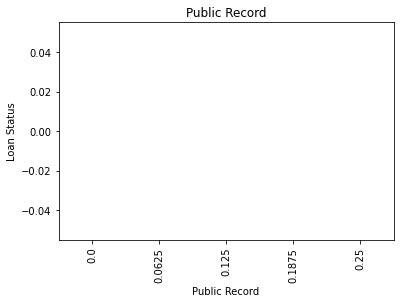

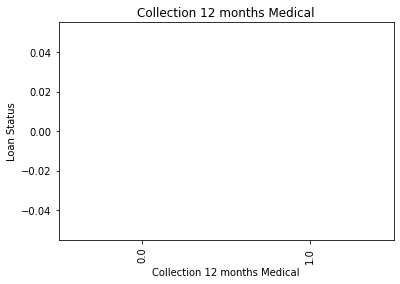

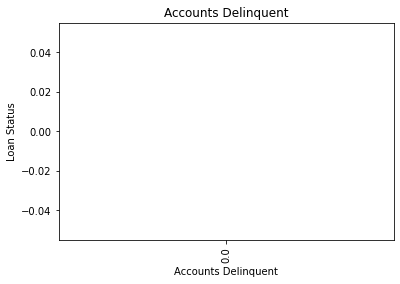

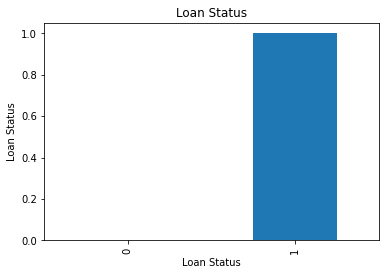

In [66]:
for feature in discrete_feature:
    data.groupby(feature)['Loan Status'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Loan Status')
    plt.title(feature)
    plt.show()

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 18


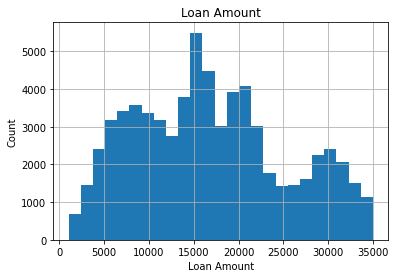

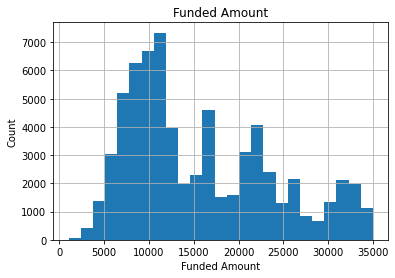

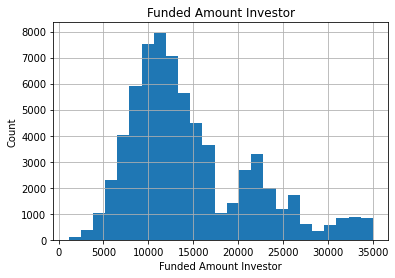

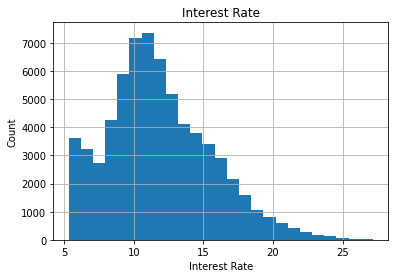

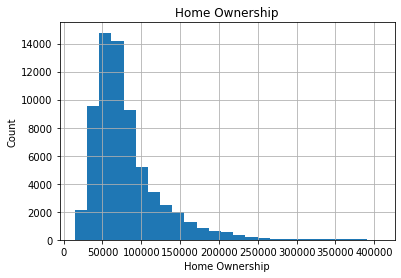

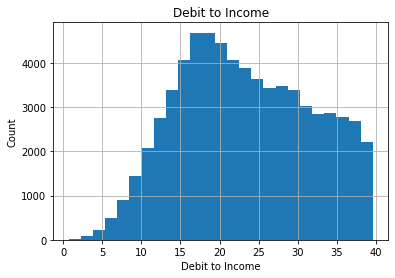

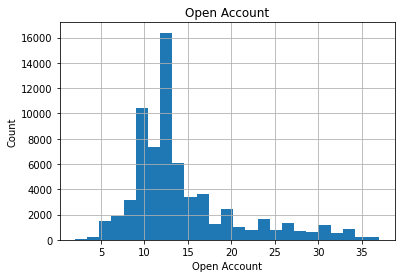

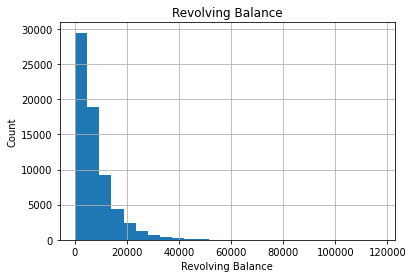

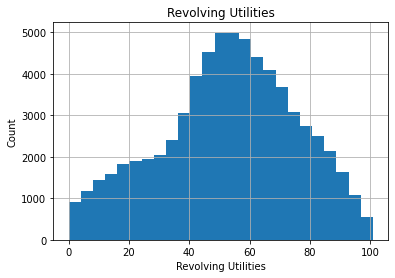

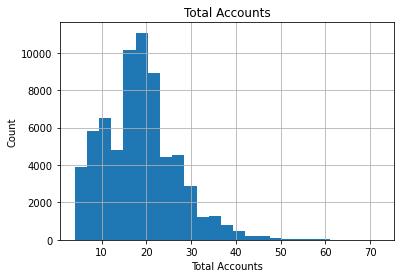

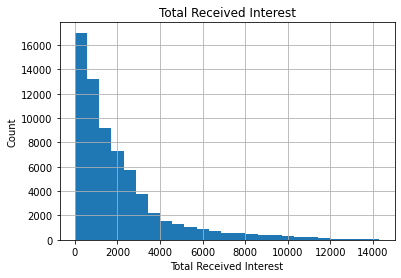

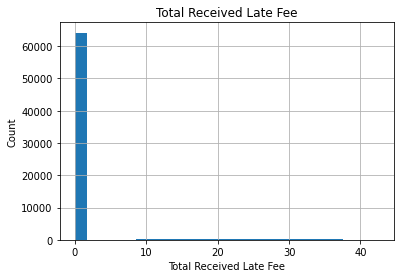

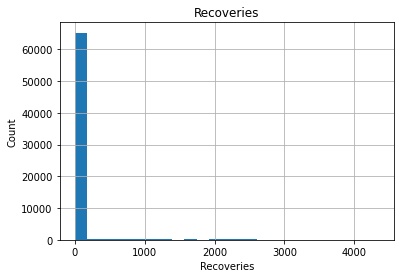

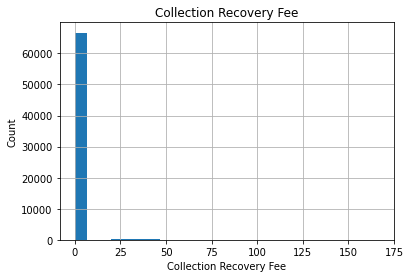

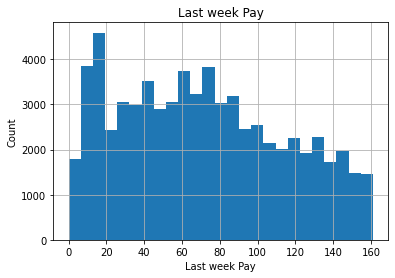

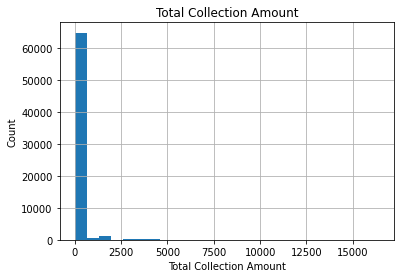

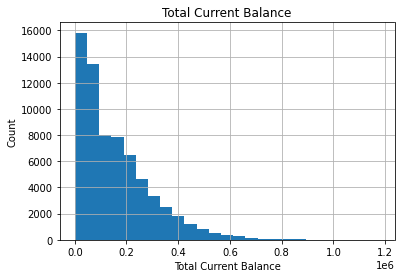

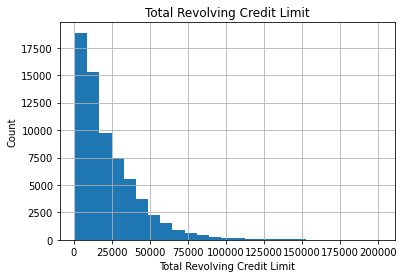

In [21]:
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Since the numerical variables are skewed we will perform log normal distribution


In [25]:
data.head(2)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.9210,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0


In [26]:
#Numerical Attributes - My Function
def numericalattributes(X):
    Output = pd.DataFrame()
    Output['Variables'] = X.columns
    Output['Skewness'] = X.skew().values
    Output ['Kurtosis'] = X.kurt().values
    Output ['Standarddeviation'] = X.std().values
    Output ['Variance'] = X.var().values
    Output ['Mean'] = X.mean().values
    Output ['Median'] = X.median().values
    Output ['Minimum'] = X.min().values
    Output ['Maximum'] = X.max().values
    Output ['Sum'] = X.sum().values
    Output ['Count'] = X.count().values
    return Output

In [ ]:
#Log Transformation
np.log2(numdata['X']+0.000000001).skew()

In [ ]:
data.head()

Null value Finding

In [ ]:
 Total = data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/len(data)).sort_values(ascending=False)
missingdata = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
print(missingdata)

**Handling Rare Categorical Feature**

We will remove categorical variables that are present less than 1% of the observations

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
categorical_features

In [35]:
for feature in categorical_features:
    temp=data.groupby(feature)['Loan Status'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')
    

In [41]:
data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,27,11.135007,0,13,0,176346.62670,1,0,0,16.284758,1,0,13,0,24246,74.932551,7,0,2929.646315,0.102055,2.498291,0.793724,0,1,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,38,12.237563,2,7,1,39833.92100,2,0,2,15.412409,0,0,12,0,812,78.297186,13,1,772.769385,0.036181,2.377215,0.974821,0,1,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,17,12.545884,5,8,0,91506.69105,2,0,0,28.137619,0,0,14,0,1843,2.073040,20,0,863.324396,18.778660,4.316277,1.020075,0,1,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,18,16.731201,2,16,0,108286.57590,2,0,2,18.043730,1,0,7,0,13819,67.467951,12,0,288.173196,0.044131,0.107020,0.749971,0,1,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,12,15.008300,2,8,0,44234.82545,2,0,3,17.209886,1,3,13,1,1544,85.250761,22,0,129.239553,19.306646,1294.818751,0.368953,0,1,18,0,430,126029,22579,0


#**Outlier**

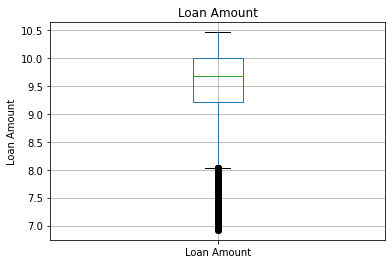

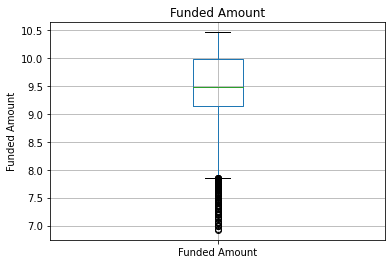

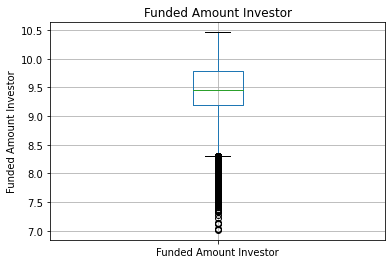

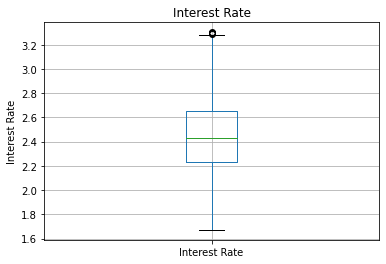

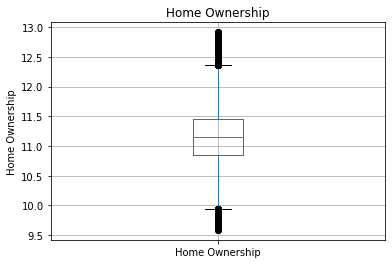

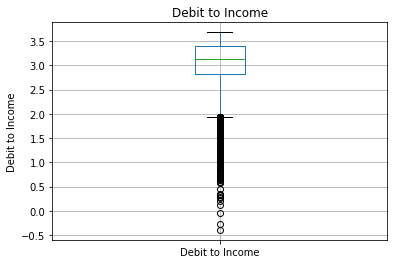

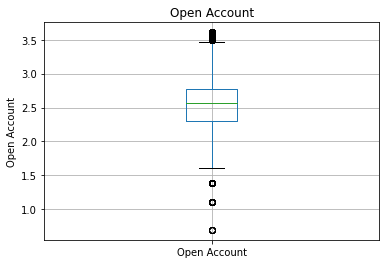

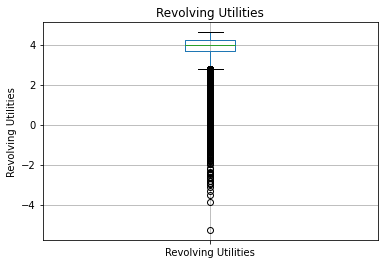

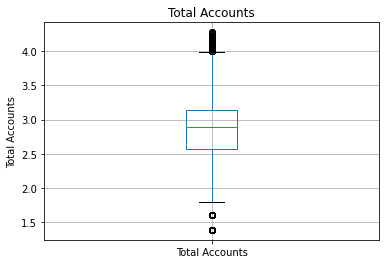

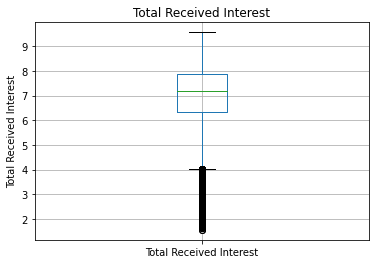

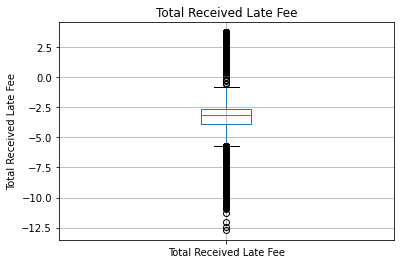

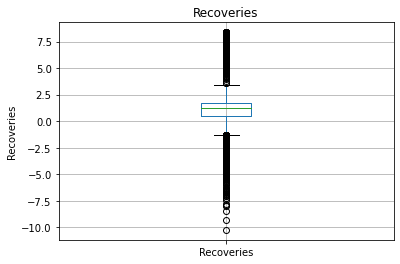

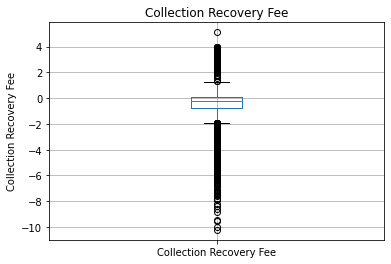

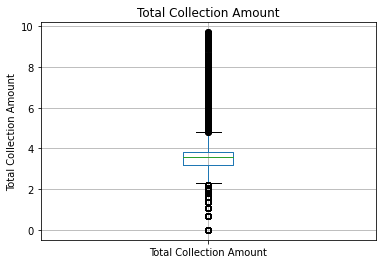

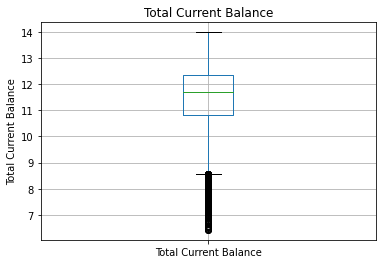

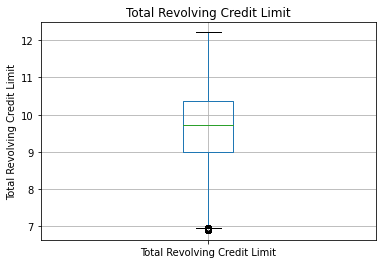

In [44]:
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Fix Outlier Range

In [45]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
upper_range = q3 + (IQR*1.5)
lower_range = q1 - (IQR*1.5)
extreme_upper_range = q3 + (IQR*3)
extreme_lower_range = q1 - (IQR*3)

Find Percentage of Outliers

In [ ]:
pd.DataFrame(((numdata < extreme_lower_range) | (numdata> extreme_upper_range)).sum(),
             columns = ['percentage of Outliers']).sort_values(by = 'percentage of Outliers', ascending = False) / len(data)

Find Count of Outliers

In [ ]:
pd.DataFrame(((numdata < extreme_lower_range) | (numdata > extreme_upper_range)).sum(),
             columns = ['No. of Outliers']).sort_values(by = 'No. of Outliers', ascending = False)

In [ ]:
data.describe()

Outlier Treatment

In [51]:
#Capping (Winzorization)
for i in numdata.columns:
    q1 = numdata[i].quantile(0.25)
    q3 = numdata[i].quantile(0.75)
    IQR = q3-q1
    UpperBound = q3 + 1.5*IQR
    LowerBound = q1 - 1.5*IQR
    UC = numdata[i].quantile(0.99)
    LC = numdata[i].quantile(0.01)
    for ind1 in numdata[i].index:
        if numdata.loc[ind1,i] > UpperBound:
            numdata.loc[ind1,i] = UC
        if numdata.loc[ind1,i] < LowerBound:
            numdata.loc[ind1,i] = LC

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


**Scaling**

In [52]:
feature_scale=[feature for feature in data.columns if feature not in ['ID','Loan Status']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [53]:
scaler.transform(data[feature_scale])

array([[0.64625657, 0.97677888, 0.69730161, ..., 0.35378893, 0.82389187,
        0.35631458],
       [0.35847733, 0.69632904, 0.69405114, ..., 0.40904209, 0.75327891,
        0.57295398],
       [0.93976056, 0.62610358, 0.86001779, ..., 0.36330575, 0.65932069,
        0.61537536],
       ...,
       [0.77714814, 0.98271631, 0.69730384, ..., 0.29189378, 0.74904123,
        0.70614506],
       [0.78880506, 0.44912041, 0.8566471 , ..., 0.42352565, 0.84362408,
        0.69106004],
       [0.76731613, 0.95530108, 0.73843556, ..., 0.39666414, 0.76329325,
        0.79005441]])

In [55]:
data = pd.concat([data[['ID', 'Loan Status']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

###Concatenating Data

In [60]:
data = pd.concat([data[['ID', 'Loan Status']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [63]:
data.head(1)

,ID,Loan Status,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,65087372,0,-1.771989,-1.678673,-1.833249,-1.521739,0.016875,-0.747129,0.0,0.017833,0.0,-2.655201,0.25,0.0,0.0,0.288347,0.015625,0.0,-0.017695,0.0,0.000002,0.631109,-0.412639,0.0,-0.094002,0.810379,0.582231,0.708961,0.0,1.0,0.00189,0.0,0.036449,-0.741462,-1.235155
